In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

train.head()

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [5]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

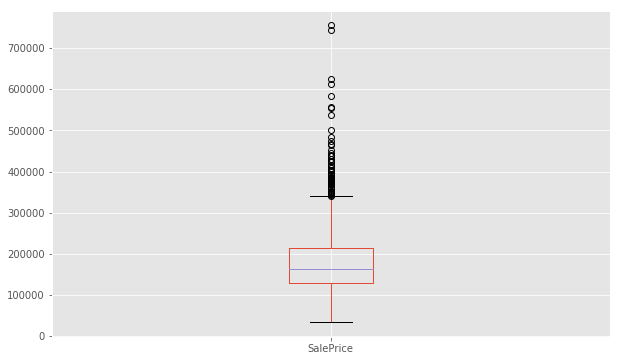

In [6]:
train['SalePrice'].plot(kind = 'box')

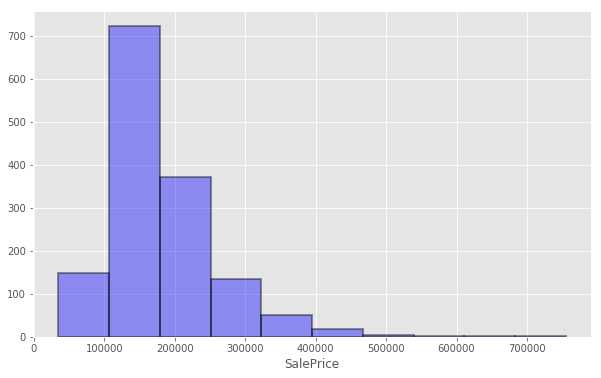

In [7]:
sns.distplot(a = train['SalePrice'], bins = 10, color = 'blue', hist_kws=dict(edgecolor="k", linewidth=2), kde = False)

In [8]:
train.SalePrice.skew()

1.8828757597682129

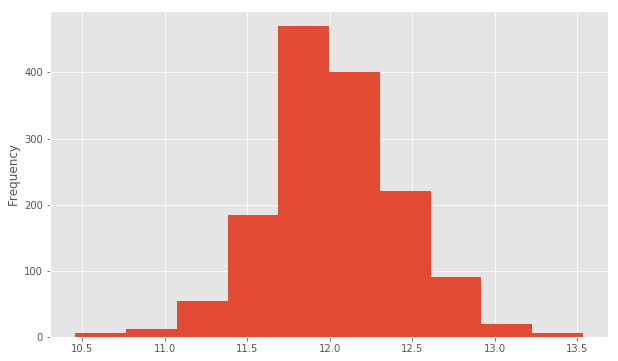

In [9]:
target = np.log(train.SalePrice)
target.skew()
target.plot(kind = 'hist')

C:\Users\utkar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


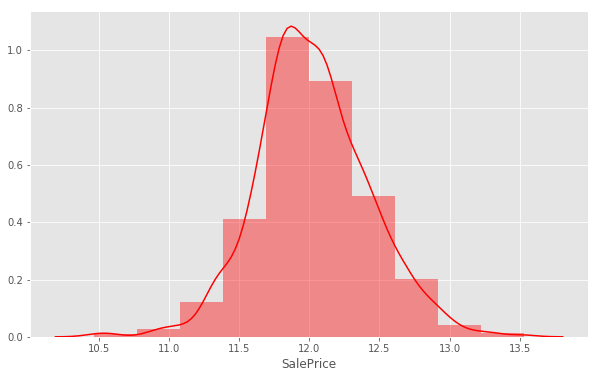

In [10]:
sns.distplot(a = target, bins = 10, color = 'red')

In [11]:
numeric_features = train.select_dtypes(include = [np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

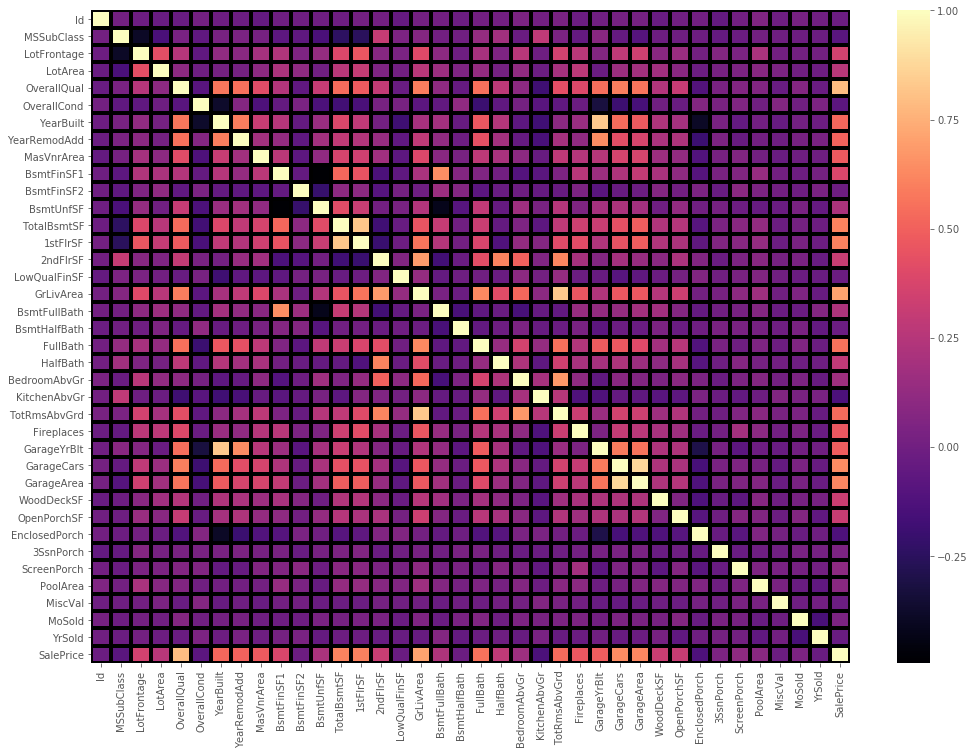

In [12]:
corr = numeric_features.corr()
plt.figure(figsize = (17, 12))
sns.heatmap(corr, cmap = 'magma', linewidth = 3, linecolor = 'black')
#plt.tight_layout()

In [13]:
corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

C:\Users\utkar\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\utkar\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
C:\Users\utkar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


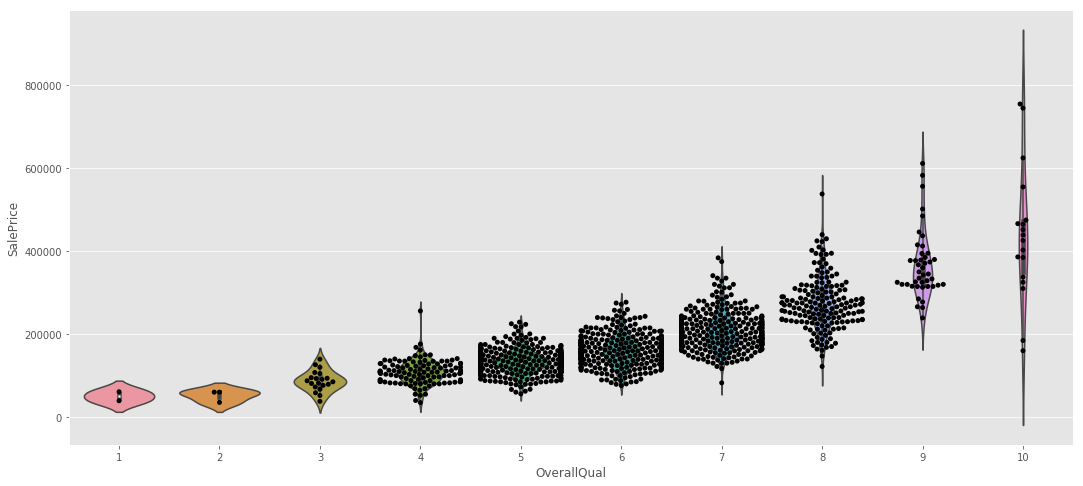

In [14]:
#train.plot(kind = 'scatter', x = 'OverallQual', y = 'SalePrice')
plt.figure(figsize = (18, 8))
sns.violinplot(x = 'OverallQual', y = 'SalePrice', data = train)
sns.swarmplot(x = 'OverallQual', y = 'SalePrice', data = train, color = 'black')

In [15]:
quality_pivot = train.pivot_table(index='OverallQual',
                                  values='SalePrice', aggfunc = np.median)

In [16]:
quality_pivot.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='OverallQual')

In [17]:
check = pd.DataFrame({'OverallQual':train['OverallQual'], 'SalePrice':train['SalePrice']})
check.groupby(by = 'OverallQual').sum()

,SalePrice
OverallQual,
1,100300
2,155311
3,1749475
4,12576796
5,53008769
6,60439535
7,66261539
8,46155570
9,15803060


In [18]:
66261539/319

207716.42319749217

C:\Users\utkar\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


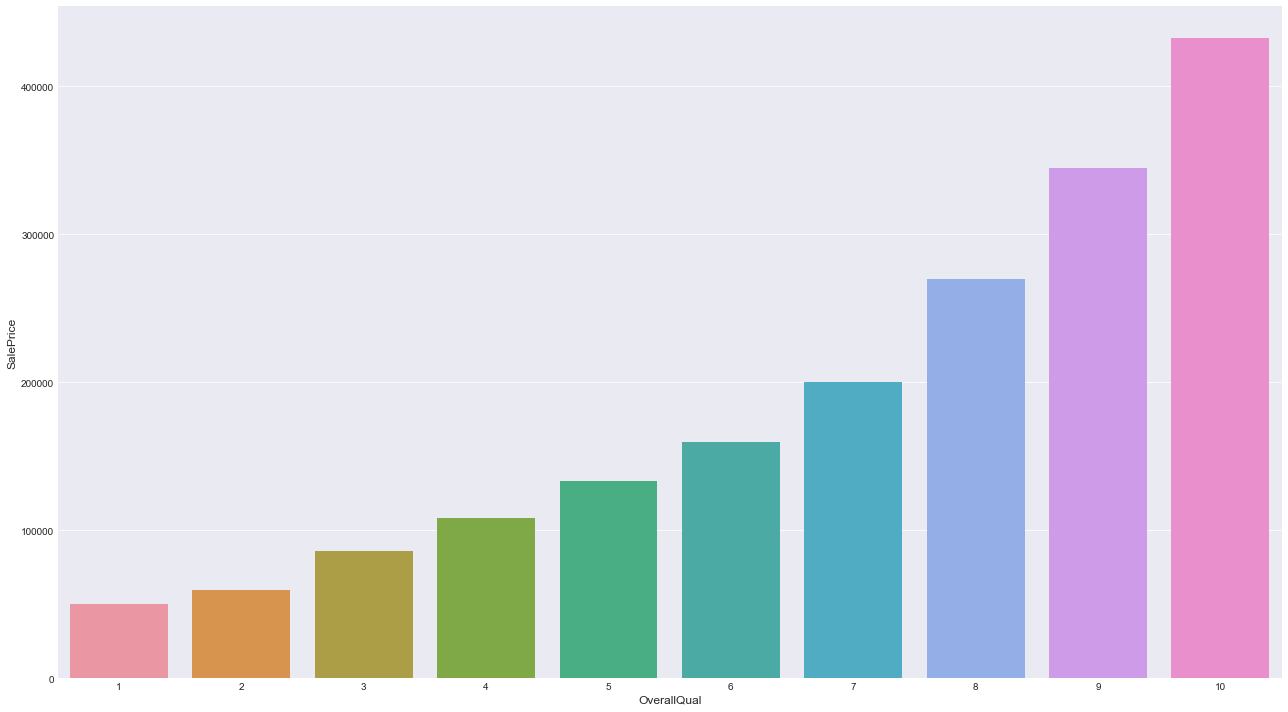

In [19]:
plt.figure(figsize = (18, 10))
sns.set_style('darkgrid')
sns.barplot(x = quality_pivot.index, y = quality_pivot['SalePrice'])
plt.tight_layout()

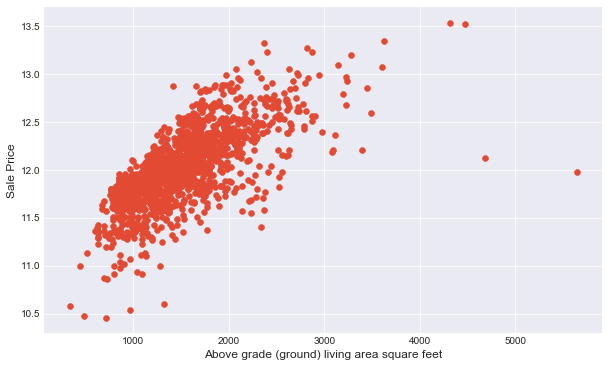

In [20]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

C:\Users\utkar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


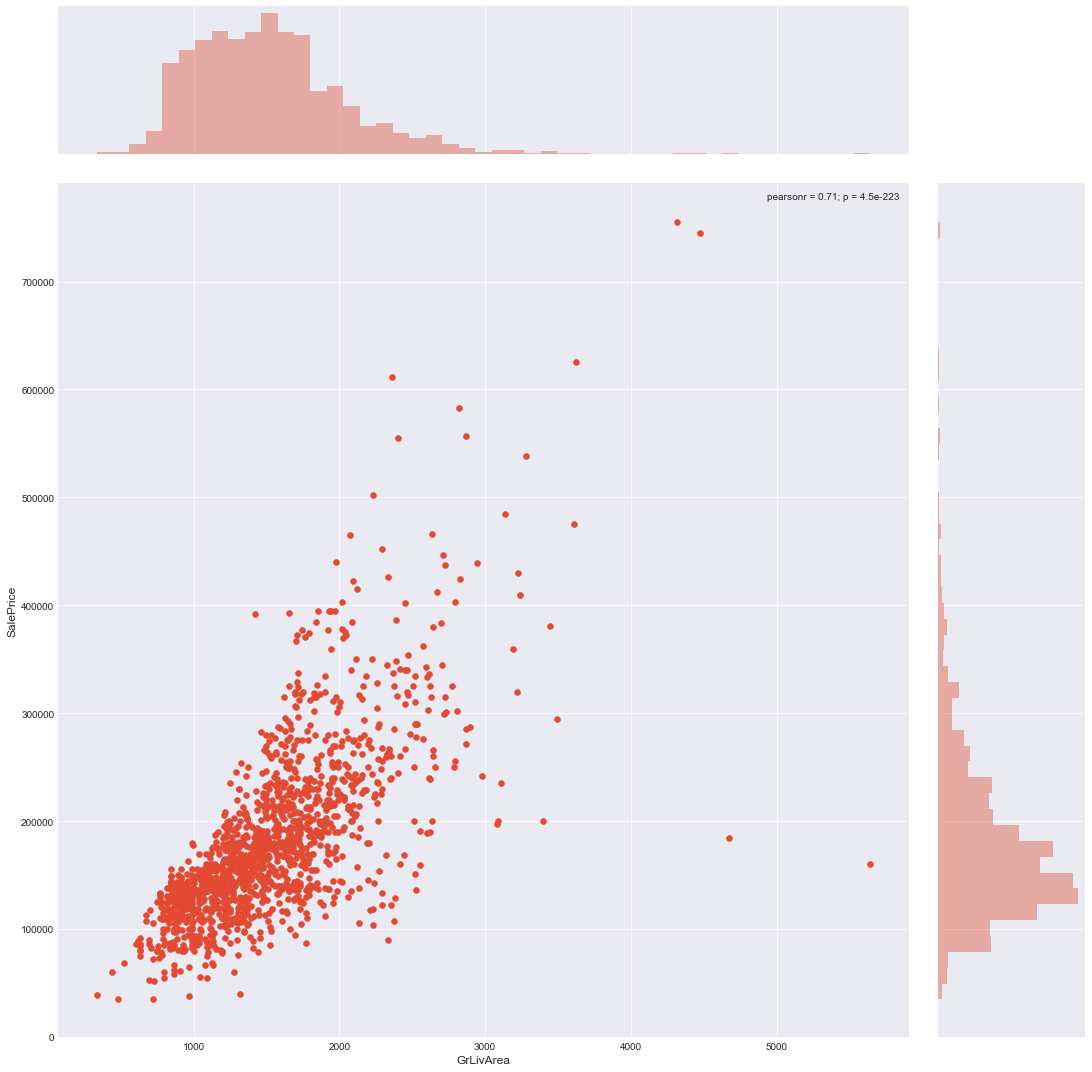

In [21]:
sns.jointplot(x = 'GrLivArea', y = 'SalePrice', data = train, size = 15)

C:\Users\utkar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


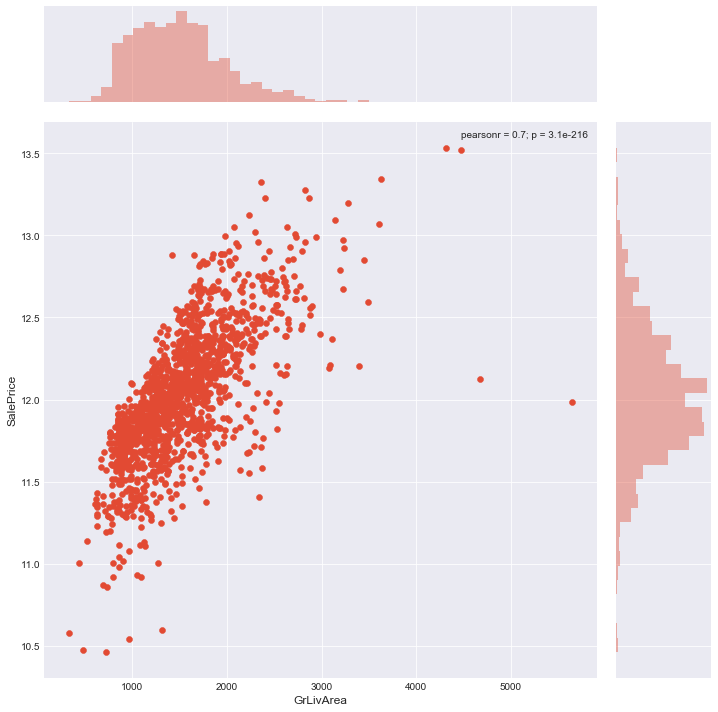

In [22]:
sns.jointplot(x = 'GrLivArea', y = target, data = train, size = 10)

C:\Users\utkar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


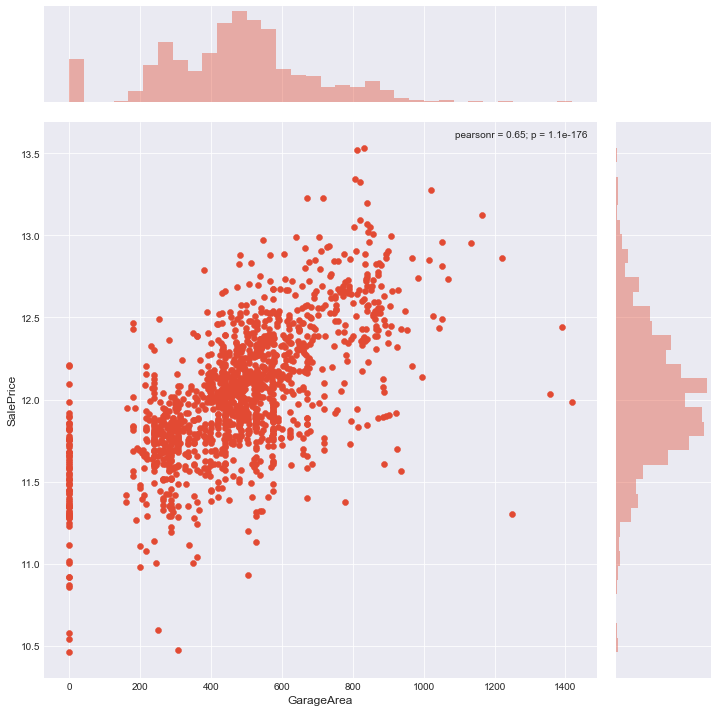

In [23]:
sns.jointplot(x = 'GarageArea', y = target, data = train, size = 10)

C:\Users\utkar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


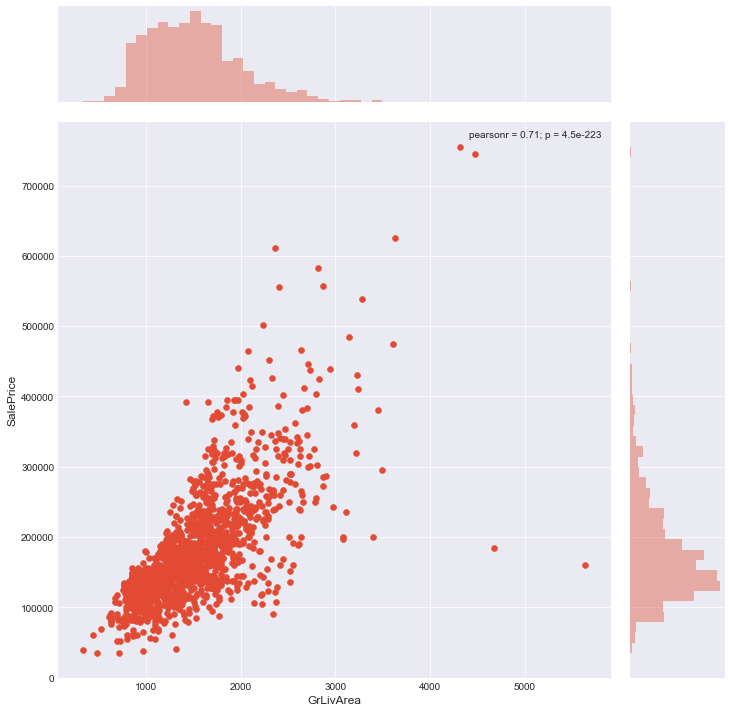

In [24]:
sns.jointplot(x = 'GrLivArea', y = 'SalePrice', data = train, size = 10)   # Not good plot

In [25]:
train = train[train['GarageArea'] < 1200]

C:\Users\utkar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


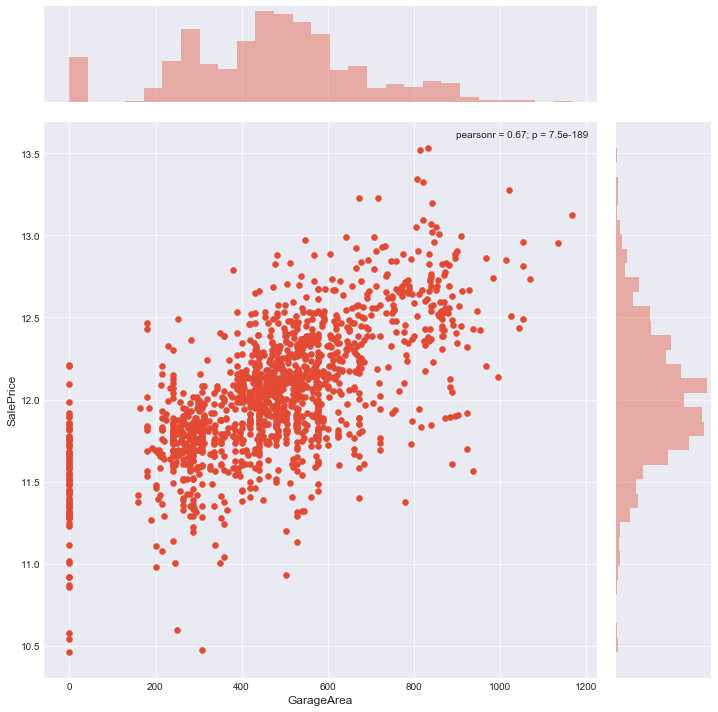

In [26]:
sns.jointplot(x = 'GarageArea', y = target, data = train, size = 10)

C:\Users\utkar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


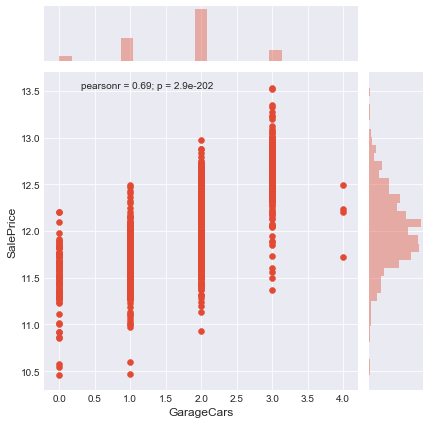

In [27]:
sns.jointplot(x = 'GarageCars', y = target, data = train)

C:\Users\utkar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


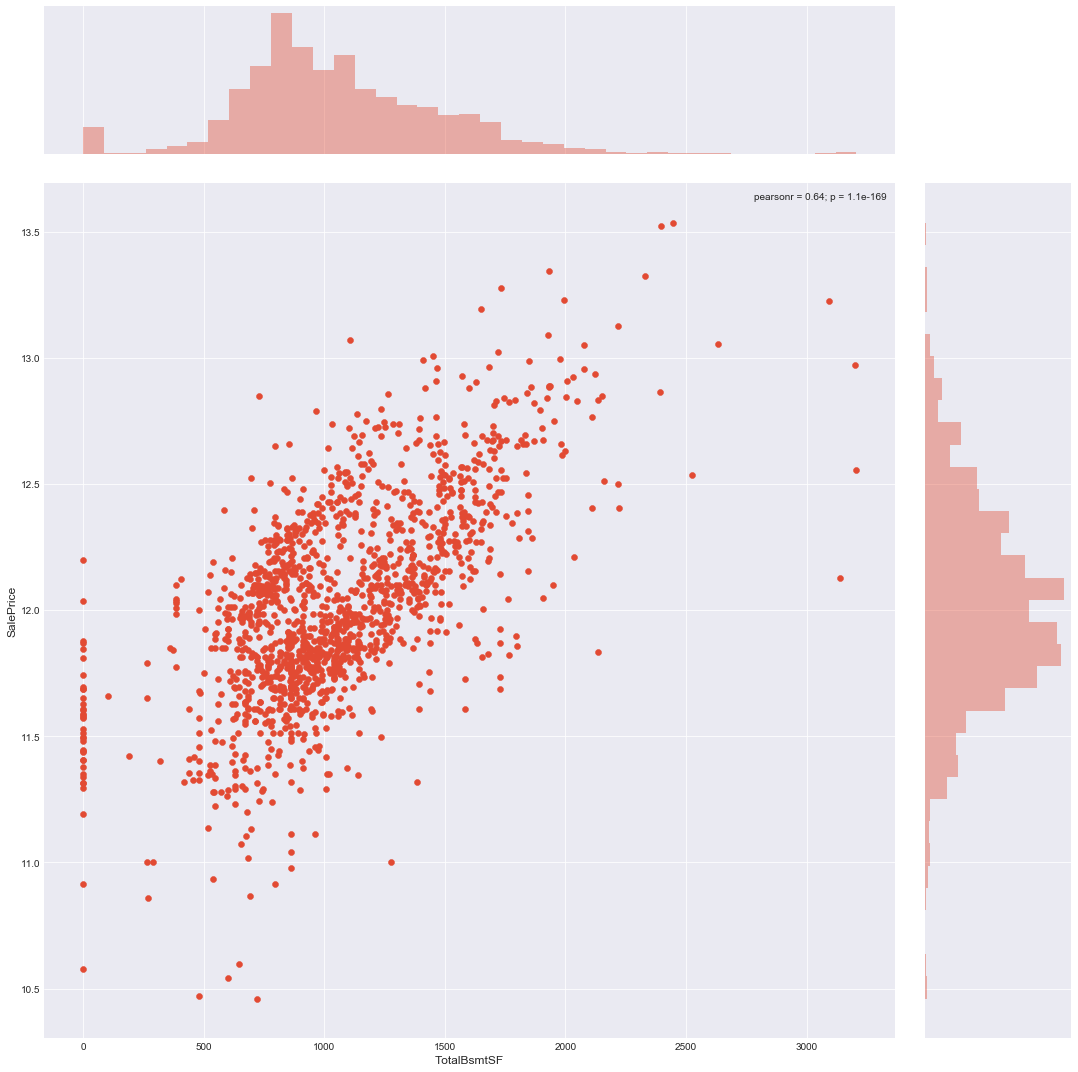

In [28]:
sns.jointplot(x = 'TotalBsmtSF', y = target, data = train, size = 15)

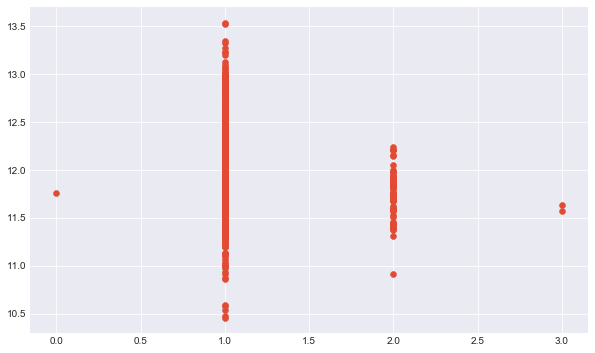

In [29]:
plt.scatter(x = train['KitchenAbvGr'], y = np.log(train['SalePrice']))

In [30]:
null_val = np.array(list(train.isnull().sum()))

In [31]:
train.columns[null_val.argmax()]

'PoolQC'

In [32]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1447,1455,1455,1455,1418,1418,1417,1418,1417,1455,1455,1455,1454,1455,1455,766,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,1441,1216,722,1139,1430,514,503,863,905,1278,644,647,1306,951,428,1251,1423,737,1360,1329,733,1355,377,867,605,1306,1321,1335,2,157,48,1266,1196


In [33]:
categoricals_test = test.select_dtypes(exclude=[np.number])
categoricals_test.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459,1459,1458,1458,1443,1459,1459,1459,1415,1414,1415,1417,1417,1459,1459,1459,1459,1458,1457,729,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,5,5,7,6,4,13,15,4,4,5,6,4,4,4,6,6,4,5,2,4,4,7,5,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,1444,1205,745,1169,1442,510,510,878,892,1256,661,634,1295,951,431,1237,1446,752,1358,1337,757,1357,364,853,625,1293,1328,1301,2,172,46,1258,1204


In [ ]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [ ]:
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [ ]:
shubham = pd.DataFrame({'A':train.SaleCondition, 'B':train.SalePrice})

In [ ]:
shubham.A.value_counts()

In [ ]:
shubham.head()

In [ ]:
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.median).plot(kind = 'bar')

In [ ]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

In [ ]:
condition_pivot = train.pivot_table(index = 'enc_condition', values = 'SalePrice', aggfunc=np.median).plot(kind = 'bar')

In [ ]:
data = train.select_dtypes(include=[np.number]).interpolate()

In [ ]:
data.shape

In [ ]:
data.isna().sum().sum()

In [ ]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [ ]:
X.shape

In [ ]:
shubham = pd.DataFrame({'A':train.MSZoning, 'B':train.SalePrice})

In [ ]:
shubham.head()

In [ ]:
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.mean).plot(kind='bar')

In [ ]:
def encode(x):
    if x == 'FV':
        return 0
    else:
        return 1

In [ ]:
train['enc_MSZoning'] = train['MSZoning'].apply(encode)
test['enc_MSZoning'] = test['MSZoning'].apply(encode)

In [ ]:
train.enc_MSZoning.value_counts()

In [ ]:
test.enc_MSZoning.value_counts()

In [ ]:
shubham = pd.DataFrame({'A':train.LotShape, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.mean).plot(kind = 'bar')

In [ ]:
train['enc_utilities'] = pd.get_dummies(train.Utilities, drop_first=True)
test['enc_utilities'] = pd.get_dummies(train.Utilities, drop_first=True)

In [ ]:
train.drop('Utilities', axis = 1, inplace=True)

In [ ]:
test.drop(labels = ['SaleCondition', 'Street', 'MSZoning', 'Utilities'], axis = 1, inplace = True)

In [ ]:
test.shape

In [ ]:
train['enc_centralair'] = pd.get_dummies(train.CentralAir, drop_first=True)
test['enc_centralair'] = pd.get_dummies(train.CentralAir, drop_first=True)

In [ ]:
train.drop('CentralAir', axis = 1, inplace=True)
test.drop('CentralAir', axis = 1, inplace=True)

In [ ]:
shubham = pd.DataFrame({'A':train.Alley, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.median).plot(kind='bar')

In [ ]:
train.Alley.fillna('U', inplace = True)
test.Alley.fillna('U', inplace = True)

In [ ]:
print(train.Alley.unique())
print(test.Alley.nunique())

In [ ]:
shubham = pd.DataFrame({'A':train.Alley, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.median).plot(kind='bar')

In [ ]:
train['enc_alley1'], train['enc_alley2'] = pd.get_dummies(train.Alley, drop_first=True)
test['enc_alley1'], test['enc_alley2'] = pd.get_dummies(train.Alley, drop_first=True)

In [ ]:
train.drop('Alley', axis = 1, inplace = True)
test.drop('Alley', axis = 1, inplace = True)

In [ ]:
train.drop('LotShape', axis = 1, inplace = True)
test.drop('LotShape', axis = 1, inplace = True)

In [ ]:
train.shape

In [ ]:
shubham = pd.DataFrame({'A':train.LandContour, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.median).plot(kind = 'bar')

In [ ]:
train['enc_lc1'], train['enc_lc2'], train['enc_lc3'] = pd.get_dummies(train.LandContour, drop_first=True)
test['enc_lc1'], test['enc_lc2'], test['enc_lc3'] = pd.get_dummies(train.LandContour, drop_first=True)

In [ ]:
train.drop('LandContour', axis = 1, inplace = True)
test.drop('LandContour', axis = 1, inplace = True)

In [ ]:
shubham = pd.DataFrame({'A':train.Neighborhood, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.median).plot(kind='bar',figsize = (12,8))

In [ ]:
def encode(x):
    if x == 'NoRidge':
        return 0
    elif x == 'NridgHt':
        return 1
    elif x == 'StoneBr':
        return 2
    else:
        return 3

In [ ]:
train['enc_neighborhoood'] = train.Neighborhood.apply(encode)
test['enc_neighborhoood'] = test.Neighborhood.apply(encode)

In [ ]:
train.drop('Neighborhood', axis = 1, inplace = True)
test.drop('Neighborhood', axis = 1, inplace = True)

In [ ]:
train['enc_nbh1'], train['enc_nbh2'], train['enc_nbh3'] = pd.get_dummies(train.enc_neighborhoood, drop_first = True)
test['enc_nbh1'], test['enc_nbh2'], test['enc_nbh3'] = pd.get_dummies(train.enc_neighborhoood, drop_first = True)

In [ ]:
train.drop('enc_neighborhoood', axis = 1, inplace = True)
test.drop('enc_neighborhoood', axis = 1, inplace = True)

In [ ]:
shubham = pd.DataFrame({'A':train.LotConfig, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.median).plot(kind='bar',figsize = (12,8))

In [ ]:
def encode(x):
    if x == 'CulDSac' or x == 'FR3':
        return 0
    else:
        return 1

In [ ]:
train['enc_lotconfig'] = train.LotConfig.apply(encode)
test['enc_lotconfig'] = test.LotConfig.apply(encode)

In [ ]:
train.drop('LotConfig', axis = 1, inplace = True)
test.drop('LotConfig', axis = 1, inplace = True)

In [ ]:
train['enc_lotconfig'] = pd.get_dummies(train.enc_lotconfig, drop_first=True)
test['enc_lotconfig'] = pd.get_dummies(train.enc_lotconfig, drop_first=True)

In [ ]:
shubham = pd.DataFrame({'A':train.LandSlope, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.mean).plot(kind = 'bar')

In [ ]:
train.drop('LandSlope', axis = 1, inplace = True)
test.drop('LandSlope', axis = 1, inplace = True)

In [ ]:
shubham = pd.DataFrame({'A':train.Condition1, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.mean).plot(kind = 'bar', figsize = (12,8))

In [ ]:
train.Condition1.value_counts()

In [ ]:
def encode(x):
    if x == 'PosA' or x == 'PosN' or x == 'RRNn':
        return 0
    elif x == 'Norm' or x == 'RRAn' or x == 'RRNe':
        return 1
    else:
        return 2

In [ ]:
train['enc_condition1'] = train.Condition1.apply(encode)
test['enc_condition1'] = test.Condition1.apply(encode)

In [ ]:
train.drop('Condition1', axis = 1, inplace = True)
test.drop('Condition1', axis = 1, inplace = True)

In [ ]:
train['enc_cond1_1'], train['enc_cond1_2'] = pd.get_dummies(train.enc_condition1, drop_first=True)
test['enc_cond1_1'], test['enc_cond1_2'] = pd.get_dummies(train.enc_condition1, drop_first=True)

In [ ]:
train.drop('enc_condition1', axis = 1, inplace = True)
test.drop('enc_condition1', axis = 1, inplace = True)

In [ ]:
shubham = pd.DataFrame({'A':train.Condition2, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.mean).plot(kind = 'bar', figsize = (12,8))

In [ ]:
def encode(x):
    if x == 'PosA':
        return 0
    else:
        return 1

In [ ]:
train['enc_condition2'] = train.Condition2.apply(encode)
test['enc_condition2'] = test.Condition2.apply(encode)

In [ ]:
train.drop('Condition2', axis = 1, inplace = True)
test.drop('Condition2', axis = 1, inplace = True)

In [ ]:
train['enc_cond2'] = pd.get_dummies(train.enc_condition2, drop_first=True)
test['enc_cond2'] = pd.get_dummies(train.enc_condition2, drop_first=True)

In [ ]:
train.drop('enc_condition2', axis = 1, inplace = True)
test.drop('enc_condition2', axis = 1, inplace = True)

In [ ]:
shubham = pd.DataFrame({'A':train.BldgType, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.mean).plot(kind = 'bar', figsize = (12,8))

In [ ]:
def encode(x):
    if x == '1Fam' or x == 'TwnhsE':
        return 0
    else:
        return 1

In [ ]:
train['enc_bldgtype'] = train.BldgType.apply(encode)
test['enc_bldgtype'] = test.BldgType.apply(encode)
train.drop('BldgType', axis = 1, inplace = True)
test.drop('BldgType', axis = 1, inplace = True)
train['enc_bldgtype'] = pd.get_dummies(train.enc_bldgtype, drop_first=True)
test['enc_bldgtype'] = pd.get_dummies(train.enc_bldgtype, drop_first=True)

In [ ]:
shubham = pd.DataFrame({'A':train.HouseStyle, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.mean).plot(kind = 'bar', figsize = (12,8))

In [ ]:
def encode(x):
    if x == '2.5Fin' or x == '2Story':
        return 0
    elif x == '1Story' or x == '2.5Unf' or x == 'SLvl':
        return 1
    else:
        return 2

In [ ]:
train['enc_housestyle'] = train.HouseStyle.apply(encode)
test['enc_housestyle'] = test.HouseStyle.apply(encode)
train.drop('HouseStyle', axis = 1, inplace = True)
test.drop('HouseStyle', axis = 1, inplace = True)
train['enc_housestyle_1'], train['enc_housestyle_2'] = pd.get_dummies(train.enc_housestyle, drop_first=True)
test['enc_housestyle_1'], test['enc_housestyle_2'] = pd.get_dummies(train.enc_housestyle, drop_first=True)
train.drop('enc_housestyle', axis = 1, inplace = True)
test.drop('enc_housestyle', axis = 1, inplace = True)

In [ ]:
shubham = pd.DataFrame({'A':train.RoofStyle, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.mean).plot(kind = 'bar', figsize = (12,8))

In [ ]:
train.RoofStyle.value_counts()

In [ ]:
def encode(x):
    if x == 'Hip' or x == 'Shed':
        return 0
    else:
        return 1

In [ ]:
train['enc_roofstyle'] = train.RoofStyle.apply(encode)
test['enc_roofstyle'] = test.RoofStyle.apply(encode)
train.drop('RoofStyle', axis = 1, inplace = True)
test.drop('RoofStyle', axis = 1, inplace = True)
train['enc_roofstyle'] = pd.get_dummies(train.enc_roofstyle, drop_first=True)
test['enc_roofstyle'] = pd.get_dummies(train.enc_roofstyle, drop_first=True)

In [ ]:
shubham = pd.DataFrame({'A':train.RoofMatl, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.mean).plot(kind = 'bar', figsize = (12,8))

In [ ]:
def encode(x):
    if x == 'WdShngl':
        return 0
    else:
        return 1

In [ ]:
train['enc_roofmatl'] = train.RoofMatl.apply(encode)
test['enc_roofmatl'] = test.RoofMatl.apply(encode)
train.drop('RoofMatl', axis = 1, inplace = True)
test.drop('RoofMatl', axis = 1, inplace = True)
train['enc_roofmatl'] = pd.get_dummies(train.enc_roofmatl, drop_first=True)
test['enc_roofmatl'] = pd.get_dummies(train.enc_roofmatl, drop_first=True)

In [ ]:
shubham = pd.DataFrame({'A':train.Exterior1st, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.mean).plot(kind = 'bar', figsize = (12,8))
shubham.groupby(by = train.Exterior1st).count().plot()

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x = train.Exterior1st)
plt.tight_layout()

In [ ]:
def encode(x):
    if x == 'VinylSd':
        return 0
    elif x == 'MetalSd' or x == 'Wd Sdng' or x == 'HdBoard':
        return 1
    else:
        return 2

In [ ]:
train['enc_exterior1st'] = train.Exterior1st.apply(encode)
test['enc_exterior1st'] = test.Exterior1st.apply(encode)
train.drop('Exterior1st', axis = 1, inplace = True)
test.drop('Exterior1st', axis = 1, inplace = True)
train['enc_exterior1st_1'], train['enc_exterior1st_2'] = pd.get_dummies(train.enc_exterior1st, drop_first=True)
test['enc_exterior1st_1'], test['enc_exterior1st_2'] = pd.get_dummies(train.enc_exterior1st, drop_first=True)
train.drop('enc_exterior1st', axis = 1, inplace = True)
test.drop('enc_exterior1st', axis = 1, inplace = True)

In [ ]:
shubham = pd.DataFrame({'A':train.Exterior2nd, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.mean).plot(kind = 'bar', figsize = (12,8))
shubham.groupby(by = train.Exterior2nd).count().plot()

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x = train.Exterior2nd)
plt.tight_layout()

In [ ]:
def encode(x):
    if x == 'VinylSd':
        return 0
    elif x == 'MetalSd' or x == 'Wd Sdng' or x == 'HdBoard' or x == 'Plywood':
        return 1
    else:
        return 2

In [ ]:
train['enc_exterior2nd'] = train.Exterior2nd.apply(encode)
test['enc_exterior2nd'] = test.Exterior2nd.apply(encode)
train.drop('Exterior2nd', axis = 1, inplace = True)
test.drop('Exterior2nd', axis = 1, inplace = True)
train['enc_exterior2nd_1'], train['enc_exterior2nd_2'] = pd.get_dummies(train.enc_exterior2nd, drop_first=True)
test['enc_exterior2nd_1'], test['enc_exterior2nd_2'] = pd.get_dummies(train.enc_exterior2nd, drop_first=True)
train.drop('enc_exterior2nd', axis = 1, inplace = True)
test.drop('enc_exterior2nd', axis = 1, inplace = True)

In [ ]:
shubham = pd.DataFrame({'A':train.MasVnrType, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.mean).plot(kind = 'bar', figsize = (12,8))

In [ ]:
def encode(x):
    if x == 'Stone':
        return 0
    else:
        return 1

In [ ]:
train['enc_masvnrtype'] = train.MasVnrType.apply(encode)
test['enc_masvnrtype'] = test.MasVnrType.apply(encode)
train.drop('MasVnrType', axis = 1, inplace = True)
test.drop('MasVnrType', axis = 1, inplace = True)
train['enc_masvnrtype'] = pd.get_dummies(train.enc_masvnrtype, drop_first=True)
test['enc_masvnrtype'] = pd.get_dummies(train.enc_masvnrtype, drop_first=True)

In [ ]:
shubham = pd.DataFrame({'A':train.ExterQual, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.mean).plot(kind = 'bar', figsize = (12,8))

In [ ]:
train.ExterQual.value_counts()

In [ ]:
def encode(x):
    if x == 'Ex':
        return 0
    elif x == 'Gd':
        return 1
    else:
        return 2

In [ ]:
train['enc_exterqual'] = train.ExterQual.apply(encode)
test['enc_exterqual'] = test.ExterQual.apply(encode)
train.drop('ExterQual', axis = 1, inplace = True)
test.drop('ExterQual', axis = 1, inplace = True)
train['enc_exterqual_1'], train['enc_exterqual_2'] = pd.get_dummies(train.enc_exterqual, drop_first=True)
test['enc_exterqual_1'], test['enc_exterqual_2'] = pd.get_dummies(train.enc_exterqual, drop_first=True)
train.drop('enc_exterqual', axis = 1, inplace = True)
test.drop('enc_exterqual', axis = 1, inplace = True)

In [ ]:
shubham = pd.DataFrame({'A':train.ExterCond, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.mean).plot(kind = 'bar', figsize = (12,8))

In [ ]:
train.ExterCond.value_counts()

In [ ]:
def encode(x):
    if x == 'Ex' or x == 'Gd' or x == 'TA':
        return 0
    else:
        return 1

In [ ]:
train['enc_extercond'] = train.ExterCond.apply(encode)
test['enc_extercond'] = test.ExterCond.apply(encode)
train.drop('ExterCond', axis = 1, inplace = True)
test.drop('ExterCond', axis = 1, inplace = True)
train['enc_extercond'] = pd.get_dummies(train.enc_extercond, drop_first=True)
test['enc_extercond'] = pd.get_dummies(train.enc_extercond, drop_first=True)

In [ ]:
shubham = pd.DataFrame({'A':train.Foundation, 'B':train.SalePrice})
pd.pivot_table(index = 'A', values = 'B', data = shubham, aggfunc=np.mean).plot(kind = 'bar', figsize = (12,8))

In [ ]:
train.Foundation.value_counts()